<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [125]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

El campo Date esta siendo tomado como Object y no como date. Forzamos a que sea date para que la fecha no sea tomada como variable categorica

import datetime

def date_parser(d):
    try:
        d = datetime.datetime.strptime(d, "%d/%m/%Y")
    except ValueError:
        print ("error")
    return d

res = date_parser("20/12/2010")
print (res)


melb_df = pandas.read_csv(
    'merged_sales.csv',parse_dates = ["Date"] , date_parser = date_parser  )

In [126]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'merged_sales.csv'  )


melb_df[:5]
melb_df_original = melb_df.copy(deep=True)

In [127]:
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'BuildingArea', 'YearBuilt', 'zipcode', 'airbnb_price_mean',
       'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

In [128]:
melb_df.dtypes

Suburb                        object
Rooms                          int64
Type                          object
Price                        float64
Postcode                     float64
Bedroom2                     float64
Bathroom                     float64
Car                          float64
Landsize                     float64
CouncilArea                   object
Lattitude                    float64
Longtitude                   float64
BuildingArea                 float64
YearBuilt                    float64
zipcode                      float64
airbnb_price_mean            float64
airbnb_record_count          float64
airbnb_weekly_price_mean     float64
airbnb_monthly_price_mean    float64
dtype: object

In [129]:
melb_df.shape

(11522, 19)

In [130]:
def change_types_to_int(columns):
    for column in columns:
        melb_df[column] = melb_df[column].astype(int)
        

In [131]:
#No hace falta cambiar los float a ints. Onehotencoder trabaja con floats e integers
#change_types_to_int(['Postcode', 'Bedroom2' , 'Bathroom' , 'Car' ,  'Propertycount'  ])
change_types_to_int(['Bedroom2' ])

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [132]:
melb_df.dtypes

Suburb                        object
Rooms                          int64
Type                          object
Price                        float64
Postcode                     float64
Bedroom2                       int64
Bathroom                     float64
Car                          float64
Landsize                     float64
CouncilArea                   object
Lattitude                    float64
Longtitude                   float64
BuildingArea                 float64
YearBuilt                    float64
zipcode                      float64
airbnb_price_mean            float64
airbnb_record_count          float64
airbnb_weekly_price_mean     float64
airbnb_monthly_price_mean    float64
dtype: object

In [133]:
melb_df[:5]

,Suburb,Rooms,Type,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3067.0,2,1.0,1.0,202.0,Yarra,-37.7996,144.9984,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,3067.0,2,1.0,0.0,156.0,Yarra,-37.8079,144.9934,79.0,1900.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,3067.0,3,2.0,0.0,134.0,Yarra,-37.8093,144.9944,150.0,1900.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,3067.0,3,2.0,1.0,94.0,Yarra,-37.7969,144.9969,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,3067.0,3,1.0,2.0,120.0,Yarra,-37.8072,144.9941,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258


Ponemos este if por si corremos varias veces la celda. Si la celda se corre varias veces (haciendo pruebas),la segunda vez falla el drop por no tener las columnas que se eliminaron en la corrida previa

In [134]:
if 'BuildingArea' in melb_df.columns:
    
    melb_df_building_area_year_built = melb_df[['BuildingArea','YearBuilt']]
    melb_df = melb_df.drop(['BuildingArea','YearBuilt'] , axis = 1)

In [135]:
melb_df_building_area_year_built

,BuildingArea,YearBuilt
0,NaN,NaN
1,79.0,1900.0
2,150.0,1900.0
3,NaN,NaN
4,142.0,2014.0
...,...,...
11517,172.0,1980.0
11518,NaN,NaN
11519,NaN,1981.0
11520,133.0,1995.0


In [136]:
melb_df

,Suburb,Rooms,Type,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3067.0,2,1.0,1.0,202.0,Yarra,-37.79960,144.99840,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,3067.0,2,1.0,0.0,156.0,Yarra,-37.80790,144.99340,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,3067.0,3,2.0,0.0,134.0,Yarra,-37.80930,144.99440,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,3067.0,3,2.0,1.0,94.0,Yarra,-37.79690,144.99690,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,3067.0,3,1.0,2.0,120.0,Yarra,-37.80720,144.99410,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11517,Werribee,4,h,635000.0,3030.0,4,2.0,1.0,662.0,Point Cook,-37.89327,144.64789,3030.0,115.748062,258.0,590.000000,2224.600000
11518,Westmeadows,3,h,582000.0,3049.0,3,2.0,2.0,256.0,Westmeadows,-37.67917,144.89390,3049.0,92.285714,21.0,400.000000,NaN
11519,Wheelers Hill,4,h,1245000.0,3150.0,4,2.0,2.0,652.0,Glen Waverley,-37.90562,145.16761,3150.0,124.026455,189.0,526.350000,1901.611111
11520,Williamstown,3,h,1031000.0,3016.0,3,2.0,2.0,333.0,Williamstown,-37.85927,144.87904,3016.0,191.094595,74.0,612.250000,2119.750000


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [137]:
melb_df.dtypes

Suburb                        object
Rooms                          int64
Type                          object
Price                        float64
Postcode                     float64
Bedroom2                       int64
Bathroom                     float64
Car                          float64
Landsize                     float64
CouncilArea                   object
Lattitude                    float64
Longtitude                   float64
zipcode                      float64
airbnb_price_mean            float64
airbnb_record_count          float64
airbnb_weekly_price_mean     float64
airbnb_monthly_price_mean    float64
dtype: object

Notar que hacemos el encoding de variables categóricas discretas representadas por tipos de datos float. Queremos aclarar que acá seleccionamos únicamente las variables numéricas que son discretas. Las consideramos discretas, por más que estén utilizando un tipo de dato float. Podríamos convertir las variables al tipo int, pero esto no es necesario para usar onehotencoder.

In [138]:
categorical_cols = ['Suburb', 'CouncilArea' , 'Type']
numerical_cols = ['Rooms', 'Bedroom2' , 'Bathroom' , 'Car']

In [139]:
categorical_cols

['Suburb', 'CouncilArea', 'Type']

In [140]:
numerical_cols

['Rooms', 'Bedroom2', 'Bathroom', 'Car']

In [141]:
melb_df[categorical_cols].nunique()

Suburb         305
CouncilArea    179
Type             3
dtype: int64

In [142]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Suburb         0
CouncilArea    0
Type           0
dtype: int64

In [143]:
# Fill nan values on sparse matrix.
#if numpy.any(numpy.isnan(feature_matrix.data)):
#  feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

In [144]:
def convert_to_dense(feature_matrix , limit_size_mb = 10):
    # Before doing this type of conversion, it's mandatory to calculate the
    # size of the resulting matrix!
    matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
    print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

    precision_type = numpy.float32
    if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
      dense_feature_matrix = feature_matrix.astype(precision_type).todense()
    else:
      # We calculate how many rows would fit given the number of columns
      n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
      print("Matrix too big! Using only first {} of {} rows".format(
          n_rows, feature_matrix.shape[0]))
      dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

    print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))
    
    return dense_feature_matrix


# OneHotEncoder

## Variables categoricas tipo float

In [145]:
from sklearn.preprocessing import OneHotEncoder

In [146]:
encoder_numeric = OneHotEncoder(sparse=True)
encoder_numeric.fit(melb_df[numerical_cols])
# We can inspect the categories found by the encoder
encoder_numeric.categories_

[array([1, 2, 3, 4]),
 array([1, 2, 3, 4]),
 array([0., 1., 2., 3.]),
 array([0., 1., 2., 3.])]

In [147]:
feature_matrix_numerical = encoder_numeric.transform(melb_df[numerical_cols])
feature_matrix_numerical[:10]

<10x16 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [148]:
encoder_numeric.get_feature_names(numerical_cols)

array(['Rooms_1', 'Rooms_2', 'Rooms_3', 'Rooms_4', 'Bedroom2_1',
       'Bedroom2_2', 'Bedroom2_3', 'Bedroom2_4', 'Bathroom_0.0',
       'Bathroom_1.0', 'Bathroom_2.0', 'Bathroom_3.0', 'Car_0.0',
       'Car_1.0', 'Car_2.0', 'Car_3.0'], dtype=object)

In [149]:
dense_feature_matrix = convert_to_dense(feature_matrix = feature_matrix_numerical , limit_size_mb = 23)

The dense matrix will weight approximately 0.70 MB
Final size: 0.70


In [150]:
dense_feature_matrix

matrix([[0., 1., 0., ..., 1., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [151]:
dense_feature_matrix.shape

(11522, 16)

In [152]:
melb_df_numerical = pandas.DataFrame(data = dense_feature_matrix , columns = encoder_numeric.get_feature_names(numerical_cols) )

In [153]:
melb_df_numerical[:5]

,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Bedroom2_1,Bedroom2_2,Bedroom2_3,Bedroom2_4,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Car_0.0,Car_1.0,Car_2.0,Car_3.0
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Variables categoricas tipo object

In [154]:
encoder_object = OneHotEncoder(sparse=True)
encoder_object.fit(melb_df[categorical_cols])
# We can inspect the categories found by the encoder
encoder_object.categories_

[array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Aspendale Gardens', 'Attwood',
        'Avondale Heights', 'Bacchus Marsh', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaconsfield',
        'Beaconsfield Upper', 'Beaumaris', 'Bellfield', 'Bentleigh',
        'Bentleigh East', 'Berwick', 'Black Rock', 'Blackburn',
        'Blackburn North', 'Blackburn South', 'Bonbeach', 'Boronia',
        'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton', 'Brighton East',
        'Broadmeadows', 'Brookfield', 'Brooklyn', 'Brunswick',
        'Brunswick East', 'Brunswick West', 'Bulleen', 'Bundoora',
        'Burnley', 'Burnside', 'Burnside Heights', 'Burwood',
        'Burwood East', 'Cairnlea', 'Camberwell', 'Campbellfield',
        'Canterbury', 'Carlton', 'Carlton Nort

In [155]:
feature_matrix_object = encoder_object.transform(melb_df[categorical_cols])
feature_matrix_object[:10]

<10x487 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [156]:
encoder_object.get_feature_names(categorical_cols)

array(['Suburb_Abbotsford', 'Suburb_Aberfeldie', 'Suburb_Airport West',
       'Suburb_Albanvale', 'Suburb_Albert Park', 'Suburb_Albion',
       'Suburb_Alphington', 'Suburb_Altona', 'Suburb_Altona Meadows',
       'Suburb_Altona North', 'Suburb_Ardeer', 'Suburb_Armadale',
       'Suburb_Ascot Vale', 'Suburb_Ashburton', 'Suburb_Ashwood',
       'Suburb_Aspendale', 'Suburb_Aspendale Gardens', 'Suburb_Attwood',
       'Suburb_Avondale Heights', 'Suburb_Bacchus Marsh',
       'Suburb_Balaclava', 'Suburb_Balwyn', 'Suburb_Balwyn North',
       'Suburb_Bayswater', 'Suburb_Bayswater North',
       'Suburb_Beaconsfield', 'Suburb_Beaconsfield Upper',
       'Suburb_Beaumaris', 'Suburb_Bellfield', 'Suburb_Bentleigh',
       'Suburb_Bentleigh East', 'Suburb_Berwick', 'Suburb_Black Rock',
       'Suburb_Blackburn', 'Suburb_Blackburn North',
       'Suburb_Blackburn South', 'Suburb_Bonbeach', 'Suburb_Boronia',
       'Suburb_Box Hill', 'Suburb_Braybrook', 'Suburb_Briar Hill',
       'Suburb_Brighto

In [157]:
dense_feature_matrix_object = convert_to_dense(feature_matrix = feature_matrix_object , limit_size_mb = 23)

The dense matrix will weight approximately 21.41 MB
Final size: 21.41


In [158]:
#dense_feature_matrix_object = feature_matrix_object

In [159]:
dense_feature_matrix_object.shape

(11522, 487)

In [160]:
melb_df_object = pandas.DataFrame(data = dense_feature_matrix_object , columns = encoder_object.get_feature_names(categorical_cols) )

In [161]:
melb_df_object[:10]

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,CouncilArea_Whittlesea,CouncilArea_Williams Landing,CouncilArea_Williamstown,CouncilArea_Wollert,CouncilArea_Wyndham Vale,CouncilArea_Yarra,CouncilArea_Yarraville,Type_h,Type_t,Type_u
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [162]:
melb_df_object.columns.shape

(487,)

In [163]:
melb_df = melb_df_object.join (melb_df_numerical)

In [164]:
melb_df.shape

(11522, 503)

In [165]:
dense_feature_matrix.shape

(11522, 16)

Generamos un data frame a partir de la matriz exapndida

In [166]:
# Para que hace falta esto? Ya chequeamos el si
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] <= len(melb_df):
  melb_df = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df = melb_df

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

Agregamos las columnas YearBuilt y BuildingArea al data frame que creamos a partir del one hot encoder

In [167]:
# Este if lo ponemos para evitar pisar los datos si corremos varias veces la celda.
if not 'BuildingArea' in melb_df.columns:
    melb_df = melb_df.join (melb_df_building_area_year_built)
melb_df

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Car_0.0,Car_1.0,Car_2.0,Car_3.0,BuildingArea,YearBuilt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,79.0,1900.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0,1900.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,172.0,1980.0
11518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
11519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,1981.0
11520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,133.0,1995.0


In [168]:
(melb_df.isna().sum() > 0 ).sum() 

2

Existen dos columnas que tienen na (confirmamos faltantes de datos en BuildingArea , YearBuilt )

In [169]:
melb_df.isna().sum()

Suburb_Abbotsford         0
Suburb_Aberfeldie         0
Suburb_Airport West       0
Suburb_Albanvale          0
Suburb_Albert Park        0
                       ... 
Car_1.0                   0
Car_2.0                   0
Car_3.0                   0
BuildingArea           5481
YearBuilt              4552
Length: 505, dtype: int64

In [170]:
#Obtenemos todas las columnas que son numéricas
melb_df_tmp = melb_df.select_dtypes(include=numpy.number)

In [171]:
#Sacamos del data set la columna Y (Price). 
#melb_df_tmp = melb_df_tmp.drop('Price', axis = 1)

In [203]:
columns = melb_df_tmp.select_dtypes(include=numpy.number).columns.tolist()
#columns

In [173]:
from sklearn.preprocessing import MinMaxScaler
#Escalamos todos los valores
scaler = MinMaxScaler()
melb_df_tmp = pandas.DataFrame(scaler.fit_transform(melb_df_tmp), columns = columns)

In [174]:
melb_df_tmp

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Car_0.0,Car_1.0,Car_2.0,Car_3.0,BuildingArea,YearBuilt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.011633,0.297619
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.022088,0.297619
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.020910,0.976190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.025328,0.773810
11518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
11519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.779762
11520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.019585,0.863095


In [175]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df_tmp.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor() , verbose= 0 , max_iter = 20 , n_nearest_features = 5 )

In [176]:
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [177]:
#melb_data_mice = mice_imputer.fit_transform(
#    melb_data_mice)

In [178]:
melb_data_mice

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Car_0.0,Car_1.0,Car_2.0,Car_3.0,BuildingArea,YearBuilt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.021499,0.527381
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.011633,0.297619
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.022088,0.297619
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.021499,0.527381
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.020910,0.976190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.025328,0.773810
11518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.021499,0.527381
11519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.023973,0.779762
11520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.019585,0.863095


In [179]:
#Volvemos las columas a su escala original
melb_data_mice = pandas.DataFrame(scaler.inverse_transform(melb_data_mice), columns = columns)

In [180]:
melb_data_mice

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Car_0.0,Car_1.0,Car_2.0,Car_3.0,BuildingArea,YearBuilt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,146.0,1938.6
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,79.0,1900.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,150.0,1900.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,146.0,1938.6
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,172.0,1980.0
11518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,146.0,1938.6
11519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,162.8,1981.0
11520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,133.0,1995.0


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

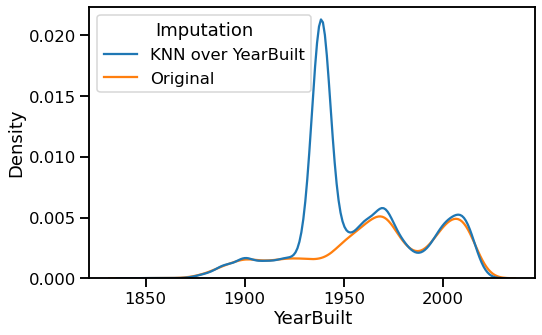

In [181]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

En nuestro caso, nosotros tomamos todas las features para que se haga la estimación de YearBuilt y BuildingArea. Como esta planteado en el práctico, se toman únicamente YearBuilt y BuildingArea para hacer la estimación de los valores faltantes.

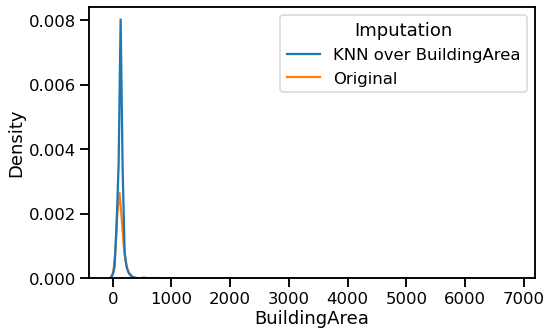

In [182]:
mice_year_built_area = melb_data_mice.BuildingArea.to_frame()
mice_year_built_area['Imputation'] = 'KNN over BuildingArea'
melb_year_build_area = melb_df.BuildingArea.dropna().to_frame()
melb_year_build_area['Imputation'] = 'Original'
data_area = pandas.concat([mice_year_built_area, melb_year_build_area])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data_area, x='BuildingArea', hue='Imputation')

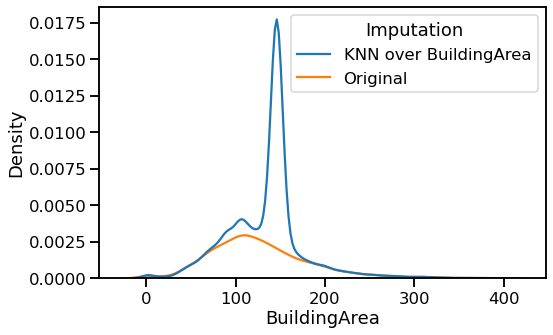

In [183]:
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data_area[data_area['BuildingArea'] < 400], x='BuildingArea', hue='Imputation')

Agregamos la columna price. A esta columna no la consideramos para hacer el knn

In [184]:
melb_data_mice.shape

(11522, 505)

In [185]:
melb_data_mice  = melb_data_mice.join(melb_df_original['Price'])

In [186]:
melb_data_mice.shape

(11522, 506)

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Se deben estandarizar las features, para ello se pede utilizar el StandarScaler. 

Ref: https://stackoverflow.com/questions/37221425/which-feature-scaling-method-to-use-before-pca

Ref: https://www.researchgate.net/post/Is-it-necessary-to-normalize-data-before-performing-principle-component-analysis

Ref: https://www.youtube.com/watch?v=qtaqvPAeEJY

Ref: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

Ref: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Si se deben estandarizar las variables puesto que PCA es sensible a la varianza de las variales. Esto singifica que las variables con mayor varianza van a dominar sobre las de menor varianza. Con lo cual variables que tengan mayor rango van a dominar sobre las de menor rango. Una variable que se mueve en el rango de 0 a 100, va a dominar sobre una que se mueva en el rango de 0 a 1

Notar que PCA calcula los eigen valores y eigen vectores de la matriz de correlazión, y recordando la forumla de covarianza :

$cov_{x,y}=\frac{\ sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

Se puede ver que si las variables estan en diferentes rangos, van a tener un impacto sobre la matriz de covarianza.

Notar que para en este caso vamos a escalar con *StandarScaler* y no *MinMaxScaler*. 

Ref: https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler/51237727

In [187]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

n_components = 20

pca_estimator = PCA(n_components=n_components) 

pca_pipe_line = make_pipeline(StandardScaler(), pca_estimator)

result = pca_pipe_line.fit_transform(melb_data_mice)
result



array([[-2.01923099,  0.16699456,  3.97469925, ..., -0.67398592,
        -0.07892972,  0.97347423],
       [-2.03005999, -0.25342718,  4.95537746, ..., -0.41617239,
        -0.02731921,  0.73731335],
       [ 1.36520043, -1.57711108,  3.2227996 , ..., -0.5516341 ,
        -0.15374786,  0.5180077 ],
       ...,
       [ 3.74619063,  4.83029135,  0.76334689, ..., -0.5891802 ,
        -3.47036638,  1.83425241],
       [ 2.63685997, -1.12742667, -0.63896499, ...,  0.7069179 ,
        -0.08406686,  0.72768741],
       [ 1.00493516,  1.14595444,  1.97694067, ..., -0.01238707,
         1.3754403 , -0.17645624]])

In [188]:
print(pca_estimator.explained_variance_ratio_)

[0.01108435 0.0065855  0.00516607 0.00468141 0.00465077 0.00412672
 0.00409881 0.00407873 0.00404731 0.00403589 0.00398233 0.00397574
 0.00395148 0.00390512 0.0039023  0.00387958 0.00385772 0.00380448
 0.00378224 0.00371347]


Text(0.5, 1.0, 'Porcentaje de varianza capturada por cada componente')

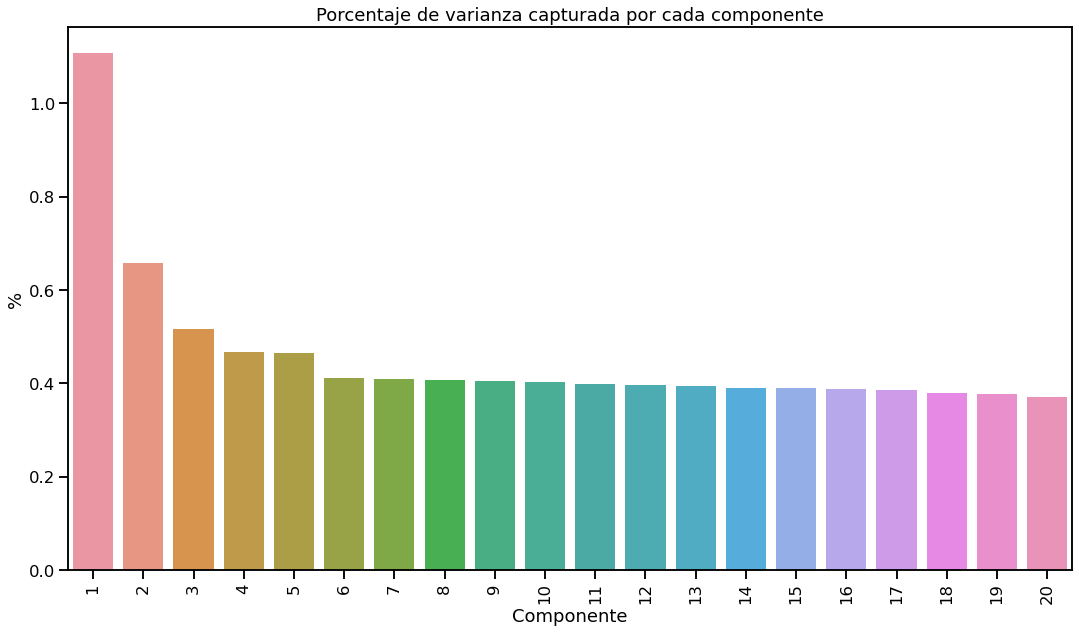

In [189]:
fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

seaborn.barplot(ax = axes , x=list(range(1, n_components + 1)), y=pca_estimator.explained_variance_ratio_ * 100 )
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.set_xlabel('Componente')
axes.set_ylabel('%')
axes.set_title('Porcentaje de varianza capturada por cada componente')

Text(0.5, 1.0, 'Cantidad varianza capturada por cada componente')

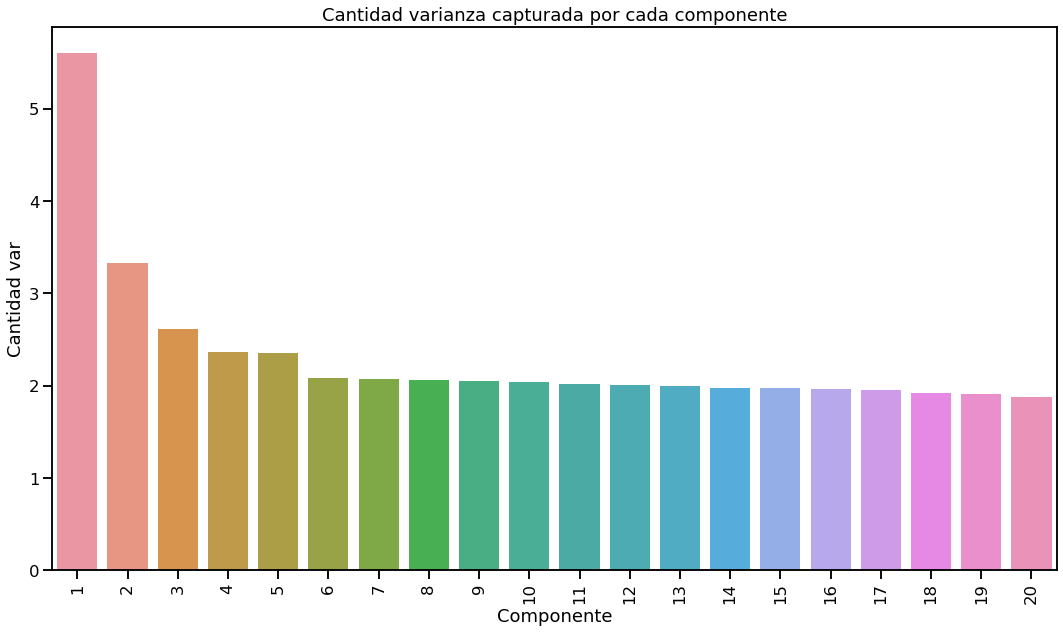

In [190]:
fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

seaborn.barplot(ax = axes , x=list(range(1, n_components + 1)), y=pca_estimator.explained_variance_ )
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.set_xlabel('Componente')
axes.set_ylabel('Cantidad var')
axes.set_title('Cantidad varianza capturada por cada componente')

Hacemos el mismo ejercicio, pero en vez de indicar la cantidad de componentes principales, indicamos que porcentaje de variabilidad queremos conservar. Se puede observar que la cantidad de columnas se reduce muy poco.

In [191]:
pca_estimator_porc = PCA(.95) 


pca_pipe_line_porc = make_pipeline(StandardScaler(), pca_estimator_porc)

result_porc = pca_pipe_line_porc.fit_transform(melb_data_mice)
result_porc

array([[-2.01914063,  0.1722136 ,  3.95608398, ..., -0.04404736,
        -0.03377986,  0.33154092],
       [-2.02985821, -0.24641738,  4.96801081, ...,  0.06836353,
        -0.00800503, -0.15788977],
       [ 1.36538711, -1.56417649,  3.22045622, ...,  0.2067982 ,
         0.06575522, -0.4960646 ],
       ...,
       [ 3.74738947,  4.75583562,  0.65076345, ...,  0.16612318,
         0.12171938, -0.20123427],
       [ 2.63658764, -1.07352798, -0.69104596, ...,  0.08416897,
         0.05982625,  0.03971219],
       [ 1.0050511 ,  1.12457977,  1.96768761, ...,  0.19781137,
         0.15986649, -0.15939025]])

In [192]:
print(f"Cantidad de features para un 95% {pca_estimator_porc.explained_variance_ratio_.shape[0]}")
print (f"Cantidad de features totales {melb_data_mice.shape[1]}")

Cantidad de features para un 95% 414
Cantidad de features totales 506


In [193]:
result[:,0:5]

array([[-2.01923099,  0.16699456,  3.97469925, -0.67763115,  0.72485785],
       [-2.03005999, -0.25342718,  4.95537746, -1.10108011,  1.79114556],
       [ 1.36520043, -1.57711108,  3.2227996 , -2.98001087,  1.58591899],
       ...,
       [ 3.74619063,  4.83029135,  0.76334689, -0.67505358,  2.35515108],
       [ 2.63685997, -1.12742667, -0.63896499, -0.42444601, -0.20538119],
       [ 1.00493516,  1.14595444,  1.97694067,  0.53327406,  2.02174806]])

In [194]:
def get_pca_data_frame(n_elements, pca_matrix):
    columns = []
    for element in range(n_elements):
        columns.append(f"PCA_{element+1}")
    
    melb_data_pca = pandas.DataFrame(pca_matrix[:,0:n_elements], columns = columns)

    return melb_data_pca

Seleccionamos las 5 primeras componentes principales. Esto es debido a que desde el componente 6 el % de varianza se mantiene casi constante, no aportando información significativa. Se ha observado que para conservar el 95% de varianza, se deberian conservar 415 componentes principales. Es decir, entendemos que para darle mayor expresividad al data set deberíamos agregar muchas más componentes principales.

In [195]:
melb_data_pca = get_pca_data_frame(5, result)

In [196]:
melb_data_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-2.019231,0.166995,3.974699,-0.677631,0.724858
1,-2.030060,-0.253427,4.955377,-1.101080,1.791146
2,1.365200,-1.577111,3.222800,-2.980011,1.585919
3,0.708326,-1.418097,1.542920,-1.831659,0.768758
4,1.199491,0.232801,2.024092,-1.274345,1.253002
...,...,...,...,...,...
11517,1.991756,2.628226,-1.655885,2.631724,2.350518
11518,2.594329,-2.379603,-1.898668,0.095532,0.163875
11519,3.746191,4.830291,0.763347,-0.675054,2.355151
11520,2.636860,-1.127427,-0.638965,-0.424446,-0.205381


In [197]:
melb_data_final = melb_data_mice.join(melb_data_pca)

In [198]:
melb_data_final.shape

(11522, 511)

In [204]:
melb_data_final[:3]

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Car_2.0,Car_3.0,BuildingArea,YearBuilt,Price,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,146.0,1938.6,1480000.0,-2.019231,0.166995,3.974699,-0.677631,0.724858
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,79.0,1900.0,1035000.0,-2.030060,-0.253427,4.955377,-1.101080,1.791146
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,150.0,1900.0,1465000.0,1.365200,-1.577111,3.222800,-2.980011,1.585919


Suburb_Abbotsford          2
Suburb_Aberfeldie          2
Suburb_Airport West        2
Suburb_Albanvale           2
Suburb_Albert Park         2
                       ...  
PCA_1                  11466
PCA_2                  11466
PCA_3                  11466
PCA_4                  11466
PCA_5                  11466
Length: 511, dtype: int64

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [200]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

def encode_and_add_pca(df, categorical_cols, numerical_cols , n_components , pca_sufix = "PCA" ):


    new_columns = []

    # Step 1: encode categorical columns
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    X_cat = encoder.fit_transform(df[categorical_cols])
    for col, col_values in zip(categorical_cols, encoder.categories_):
      for col_value in col_values:
        new_columns.append('{}={}'.format(col, col_value))
    

    # Step 2: Append the numerical columns
    X = numpy.hstack([X_cat, df[numerical_cols].values])
    new_columns.extend(numerical_cols)
    

    # Step 3: Append some new features, like PCA
    pca = PCA(n_components=n_components)
    pca_dummy_features = pca.fit_transform(X)
    X_pca = numpy.hstack([X, pca_dummy_features])
    
    # Create PCA column names
    pca_columns = []
    for component in range(n_components):
        pca_columns.append(f"{pca_sufix}_{component+1}")
        
    
    new_columns.extend(pca_columns)


    ## Re-build dataframe
    processed_df = pandas.DataFrame(data=X_pca , columns=new_columns)

    return processed_df



In [201]:
categorical_cols = ['Suburb', 'CouncilArea']
numerical_cols = ['Rooms', 'Bedroom2' , 'Bathroom' , 'Car']
    
test = encode_and_add_pca(df = melb_df_original , categorical_cols = categorical_cols, numerical_cols = numerical_cols , n_components = 5 , pca_sufix = "PCA" )

In [202]:
test.head()

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,CouncilArea=Yarraville,Rooms,Bedroom2,Bathroom,Car,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,1.274675,-0.069119,-0.031826,-0.053359,-0.053513
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,0.0,1.613805,-0.998139,0.079543,-0.060005,-0.030587
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,2.0,0.0,0.063633,-1.493504,0.661484,-0.034787,0.051346
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,2.0,1.0,-0.275496,-0.564484,0.550116,-0.028142,0.028420
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,1.0,2.0,-0.960230,0.094330,-0.682351,-0.091472,-0.093571


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


# Anexo Pruebas

https://www.youtube.com/watch?v=WPiYOS3qK70